# 🛒 Supermarket Sales EDA Project  

## 1. Dataset  
- **File**: `supermarket.csv`  
- **Source**: [Kaggle - Supermarket EDA Dataset](https://www.kaggle.com/datasets/moro146/supermarket-eda)  
- **Size**: 9,800 rows × 18 columns  
- **Description**:  
  This dataset contains detailed transaction records from a supermarket, including:  
  - **Order Details**: Row ID, Order ID, Order Date, Ship Date, Ship Mode  
  - **Customer Info**: Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region  
  - **Product Info**: Product ID, Category, Sub-Category, Product Name  
  - **Sales Info**: Sales amount per order  

---

## 2. Libraries Used  
- **pandas** → data manipulation & cleaning  
- **numpy** → numerical operations  
- **matplotlib** → basic visualizations  
- **seaborn** → advanced statistical visualizations  
- **plotly** (optional) → interactive visualizations  

---

## 3. EDA Phases  

- **✅ Phase 1: Data Understanding**
- **✅ Pahse 2: Data cleaning**
- **✅ Phase 3: Feature Engineering**
- **✅ Phase 4: Univariate Analysis**  
- **✅ Phase 5: Outlier Analysis**  
- **✅ Phase 6: Multivariate Analysis**
- **✅ Phase 7: Insights & Recommendations**
  
---


### ✅ Import libs

In [42]:
# General Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dython.nominal import associations
from plotly.subplots import make_subplots
from dython.nominal import associations


# oultiers detection 
from datasist.structdata import detect_outliers


# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# Handling warnings
import warnings
warnings.filterwarnings("ignore")

### ✅ Data Understanding 

#### ✅ Load Data

In [2]:
df = pd.read_csv("supermarket.csv")
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


#### ✅ Check Info

In [3]:
# let's show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### ✅ Summary analysis 

In [4]:
# let's show summary analysis for numeric data 
df.select_dtypes(include='number').describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
# let's show it for Categoric Data 
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Order ID,9800,4922,CA-2018-100111,14
Order Date,9800,1230,05/09/2017,38
Ship Date,9800,1326,26/09/2018,34
Ship Mode,9800,4,Standard Class,5859
Customer ID,9800,793,WB-21850,35
Customer Name,9800,793,William Brown,35
Segment,9800,3,Consumer,5101
Country,9800,1,United States,9800
City,9800,529,New York City,891
State,9800,49,California,1946


### ✅ Data Cleaning

#### ✅ Drop Null values

In [6]:
# we have a small null values 
# let's drop it 

df.dropna(axis=0,inplace=True)
df.reset_index(inplace=True,drop=True)

In [7]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9785,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9786,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9787,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


#### ✅ Fix Data type

In [8]:
# we have to date we need to convert data type from Object to date time
df['Order Date'] = pd.to_datetime(df['Order Date'],format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format="%d/%m/%Y")

In [9]:
# let's check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 n

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

### ✅ Feature Engineering

#### ✅ Date split

In [40]:
# split Order Date
df['Order-year'] = df['Order Date'].dt.year
df['Order-Month'] = df['Order Date'].dt.month

# split Ship Date
df['Ship-Year'] = df['Ship Date'].dt.year
df['Ship-Month'] = df['Ship Date'].dt.month

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order-year,Order-Month,Ship-Year,Ship-Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,2017,5
9785,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,2016,1
9786,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,2016,1
9787,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,2016,1


### ✅ Univariate analysis 

#### ✅ Numrical Columns 

In [11]:
# Let's show for Sales 
df[['Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9789.0,230.116193,625.302079,0.444,17.248,54.384,210.392,22638.48


#### ✅ Categorical Columns 

In [28]:
# ship Mode --->
# there are 4 ship wayes 
# top 1 is Stander class with frequancy 5.8K
# let's show other
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: count, dtype: int64

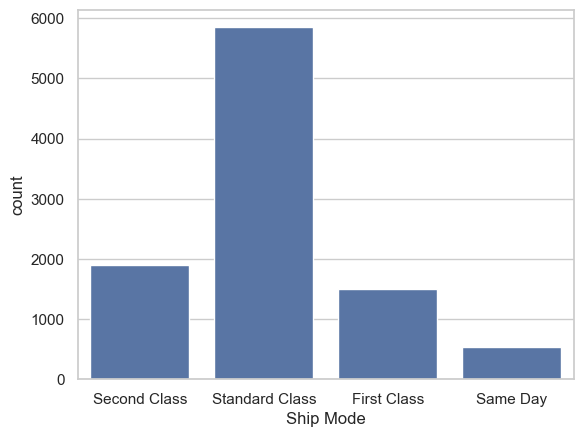

In [29]:
sns.countplot(x='Ship Mode', data=df)
plt.show()

In [12]:
# Segment --->
df['Segment'].describe()

count         9789
unique           3
top       Consumer
freq          5096
Name: Segment, dtype: object

In [13]:
# We have 3 unique segments
# The top segment is Consumer (~5K frequency)
# Let's display value counts for the remaining segments
df['Segment'].value_counts()

Segment
Consumer       5096
Corporate      2948
Home Office    1745
Name: count, dtype: int64

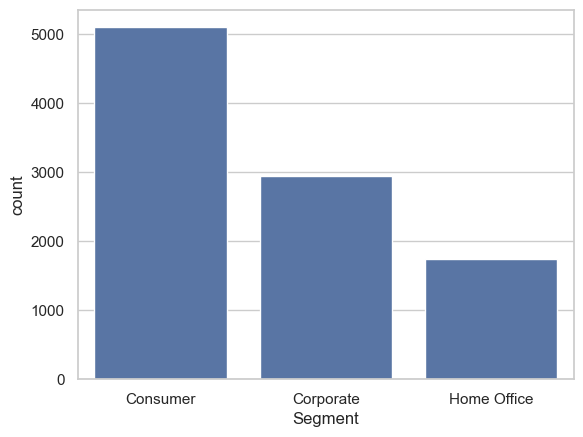

In [30]:
sns.countplot(x='Segment', data=df)
plt.show()

In [14]:
# The second column is Country, but since the summary statistics show only one unique value,
# we can skip it and move directly to City for analysis.
df["City"].describe()

count              9789
unique              529
top       New York City
freq                891
Name: City, dtype: object

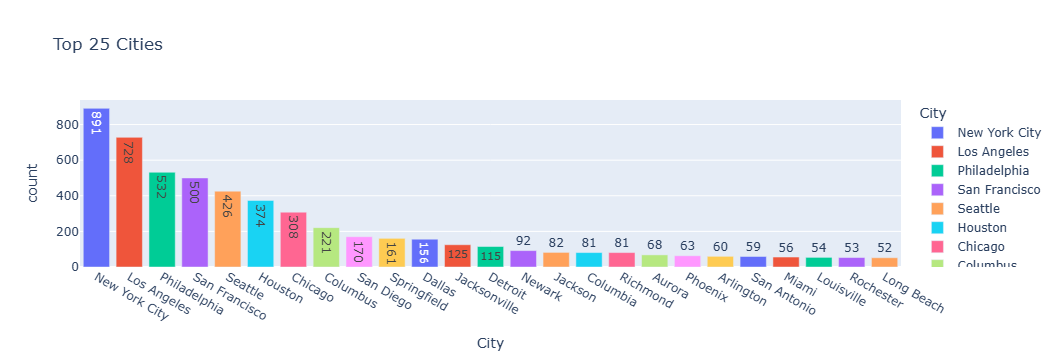

In [17]:
# There are more than 500 unique cities
# Let's get the top 25 cities
# Prepare the data
top25 =df['City'].value_counts().head(25).reset_index()

fig = px.bar(top25,x = 'City',y = 'count' , 
            color= "City",
            text_auto=True,
            title="Top 25 Cities")


# show plot 
fig.show()

In [19]:
# State --->
# there are 48 unique states
# Top 1 is California with frequancy 1.9K
# let's show freq for other states
df["State"].value_counts().reset_index()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
State,California,New York,Texas,Pennsylvania,Washington,Illinois,Ohio,Florida,Michigan,North Carolina,Virginia,Arizona,Tennessee,Colorado,Georgia,Kentucky,Massachusetts,Indiana,New Jersey,Oregon,Wisconsin,Maryland,Delaware,Minnesota,Connecticut,Missouri,Oklahoma,Alabama,Arkansas,Rhode Island,Mississippi,Utah,South Carolina,Louisiana,Nevada,Nebraska,New Mexico,New Hampshire,Iowa,Kansas,Idaho,Montana,South Dakota,District of Columbia,Maine,North Dakota,West Virginia,Wyoming
count,1946,1097,973,582,504,483,454,373,253,247,224,223,183,179,177,137,135,135,122,122,105,105,93,89,82,66,66,61,60,55,53,53,42,41,39,38,37,27,26,24,21,15,12,10,8,7,4,1


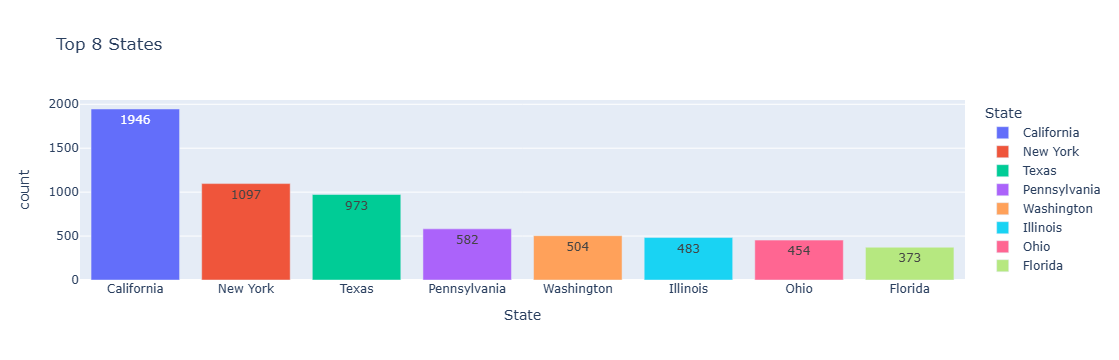

In [27]:
# let's do Bar plot for good visualize --->

fig = px.bar(

    data_frame=df["State"].value_counts().reset_index().head(8),
    x = "State", y = "count",
    color="State",
    text_auto=True,
    title="Top 8 States",
)

fig.show()

In [32]:
# let's show descriptive stat for last 3 columns 
df[['Region','Category', 'Sub-Category']].describe().T

,count,unique,top,freq
Region,9789,4,West,3140
Category,9789,3,Office Supplies,5903
Sub-Category,9789,17,Binders,1492


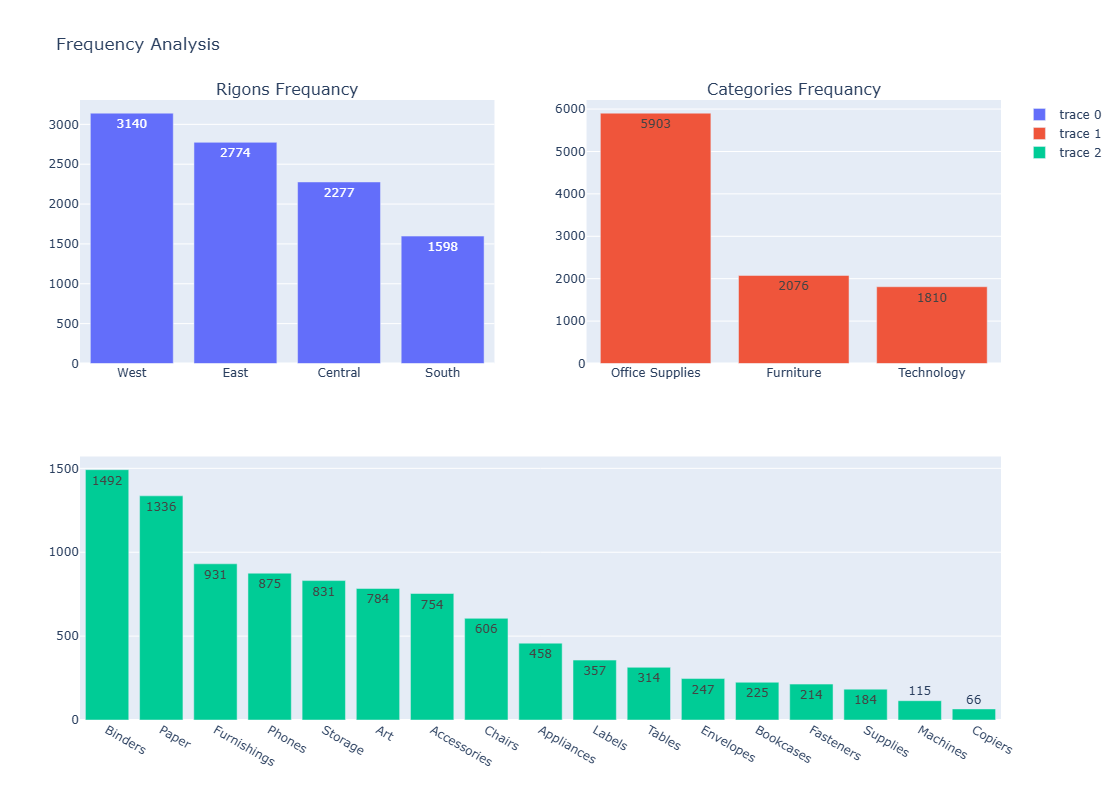

In [38]:
# let's do bar for all 
# using go it's very good for visualoze 
fig = make_subplots(rows=2,cols=2 , 
                    column_titles= ["Rigons Frequancy","Categories Frequancy","Sub-Categories Frequancy"],
                   specs=[[{}, {}],[{"colspan": 2}, None]]
                   )

fig.add_trace(go.Bar(x = df['Region'].value_counts().reset_index()['Region'],
                    y = df['Region'].value_counts().reset_index()['count'],
                    text = df['Region'].value_counts().reset_index()['count'],
                    textposition="auto"
                    ),row=1 ,  col=1
    
    )

fig.add_trace(go.Bar(x = df['Category'].value_counts().reset_index()['Category'],
                    y = df['Category'].value_counts().reset_index()['count'],
                    text = df['Category'].value_counts().reset_index()['count'],
                    textposition="auto"
                    ),row=1 ,  col=2
             )



fig.add_trace(go.Bar(x = df['Sub-Category'].value_counts().reset_index()['Sub-Category'],
                    y = df['Sub-Category'].value_counts().reset_index()['count'],
                    text = df['Sub-Category'].value_counts().reset_index()['count'],
                    textposition="auto"
                    ),row=2 ,  col=1
             )


fig.update_layout(height=800, width=1000, title_text="Frequency Analysis")
fig.show()

### ✅ Outliers Analysis 

#### ✅ Outliers Detection

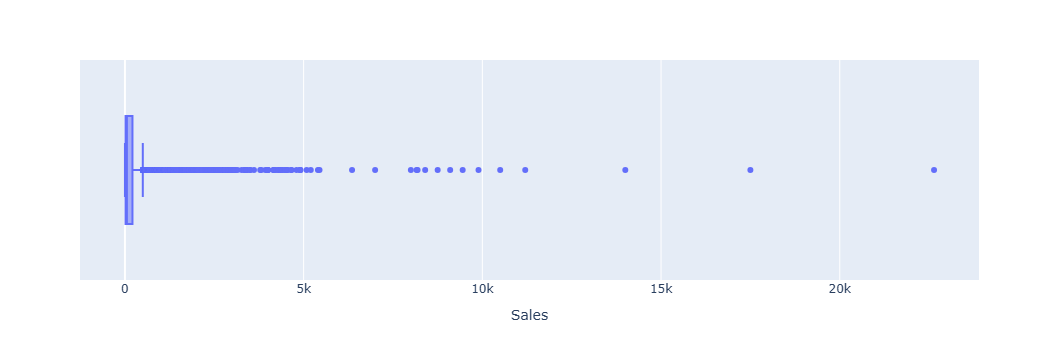

In [41]:
# let's see if there are outliers 
# i'm sure there are but let's see 
px.box(df,x = 'Sales')

In [45]:
# there are alot of outliers
# let's detect in dataset 
outliers = detect_outliers(df,0,['Sales'])

# let's see descriptive stat for it 
df.iloc[outliers][['Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1141.0,1267.969827,1427.279455,500.24,636.408,868.59,1347.52,22638.48


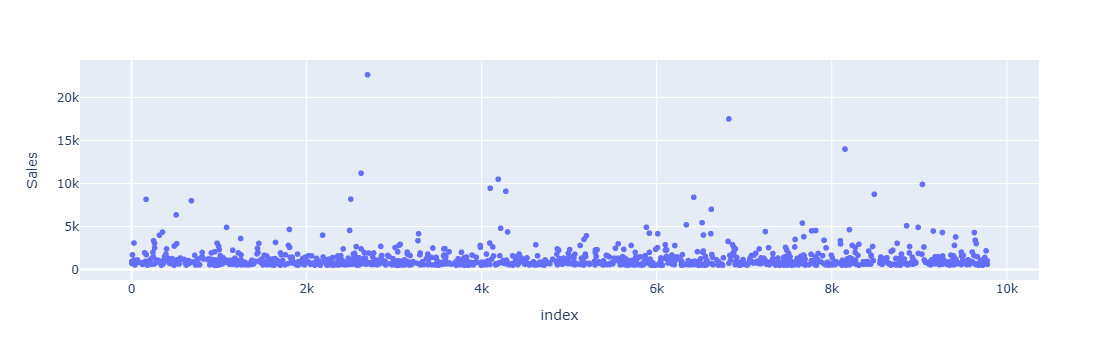

In [48]:
# lst's do scatter plot for it to more visualize 
fig = px.scatter(df.iloc[outliers] , y = 'Sales')
fig.show()

In [50]:
# The sales data shows a very wide range, with a maximum value (22,638.48) far higher than the 75th percentile (1,347.52),
# which indicates the presence of significant outliers.
# The large standard deviation (1,427.27) compared to the mean (1,267.97) also suggests high variability in sales values.
# Most of the sales are concentrated below \~1,500, but a few extreme values are pulling the maximum up drastically.
# These outliers could represent unusually large orders or potential data entry errors and should be further investigated.

#### ✅ Investigate Outliers

In [52]:
# let's see if there any Unrealistic Postal Codes
df[~df['Postal Code'].astype(str).str.match(r'^\d{5}$')]
# If many values don’t match the expected format

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order-year,Order-Month,Ship-Year,Ship-Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,2017,5
9785,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,2016,1
9786,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,2016,1
9787,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,2016,1


In [53]:
# is there any Invalid Dates? (e.g., Ship Date before Order Date)
df[df['Order Date']> df['Ship Date']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order-year,Order-Month,Ship-Year,Ship-Month


#### ✅ Decide How to Handle Them

**For Sales Outliers:**
- The outliers show a very wide range in the data
- Dropping or replacing them (e.g., with the mean) would be illogical
- Fortunately, there are no negative sales values
- Since outliers are natural in sales data, we will keep them

### ✅ Multivariate Analysis

#### ✅ a) Sales by Segment & Region

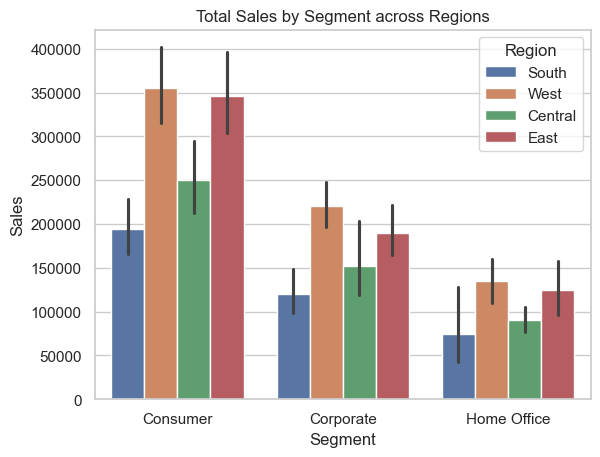

In [54]:
sns.barplot(x="Segment", y="Sales", hue="Region", data=df, estimator=sum)
plt.title("Total Sales by Segment across Regions")
plt.show()

#### ✅ b) Sales by Category & Ship Mode

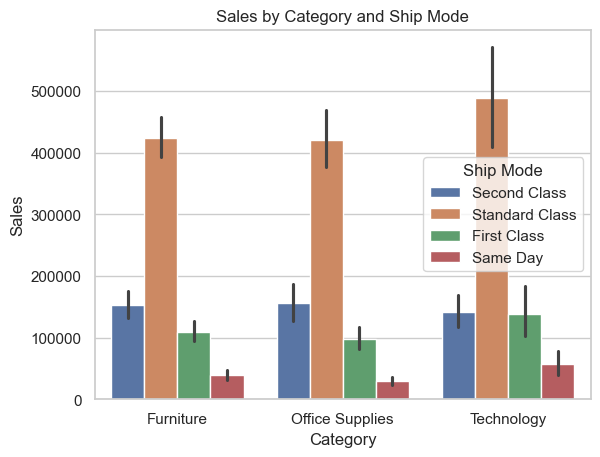

In [55]:
sns.barplot(x="Category", y="Sales", hue="Ship Mode", data=df, estimator=sum)
plt.title("Sales by Category and Ship Mode")
plt.show()

#### ✅ c) Correlation Heatmap (numeric features)

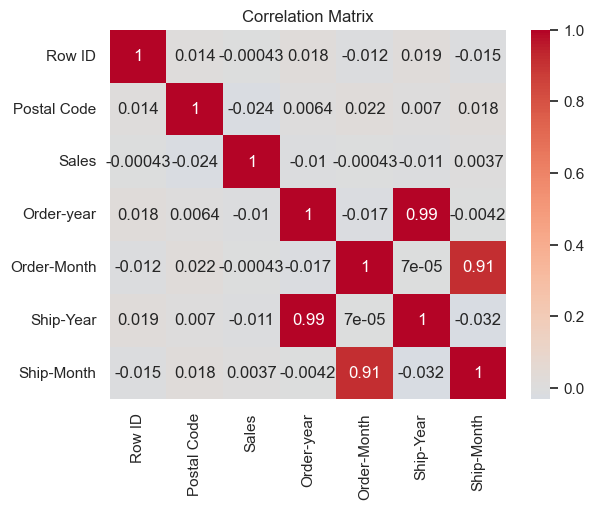

In [56]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

#### ✅ d) Time Series: Sales Trend

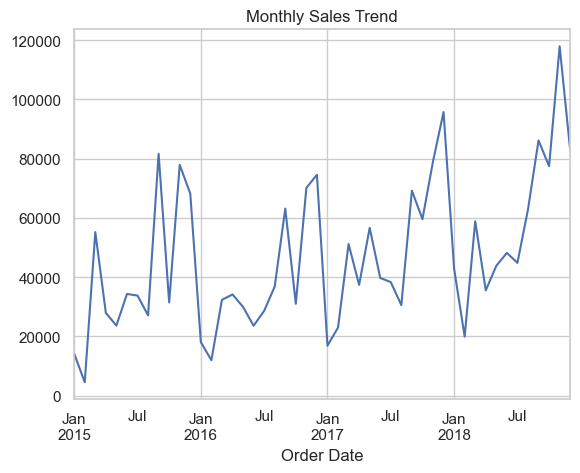

In [57]:
df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum().plot(kind='line')
plt.title("Monthly Sales Trend")
plt.show()

### ✅ Insights & Recommendations

#### ✅ Sales Performance Analysis Report

#### ✅ 1. High-Value Segments: Focus on Consumer Segment

##### Key Insight:
The **Consumer** segment dominates total sales across all regions, with significantly higher revenue compared to Corporate and Home Office segments.

##### Evidence:
- In **Figure a)** ("Total Sales by Segment across Regions"), the Consumer segment generates over **350,000 in sales**, far exceeding the other two segments.
- The West and East regions contribute the most to Consumer sales, indicating strong market penetration in these areas.

##### Recommendation:
> **Launch targeted marketing campaigns for the Consumer segment**, especially in the **West and East regions**, where demand is highest. Consider personalized promotions, loyalty programs, or digital advertising tailored to consumer behavior.

---

#### ✅ 2. Regional Opportunities: Address Underperforming Regions

##### Key Insight:
While the **West and East regions** show high sales volumes, the **South and Central regions** lag behind, particularly in the Corporate and Home Office segments.

##### Evidence:
- The South region shows consistently lower sales across all segments.
- The Central region has moderate performance but underperforms relative to its potential.

##### -Recommendation:
> **Implement regional promotional strategies** to boost engagement in the South and Central regions. This could include localized discounts, improved distribution networks, or partnerships with regional businesses. Additionally, evaluate supply chain efficiency to ensure timely delivery and inventory availability in underperforming areas.

---

#### ✅ 3. Category Performance: Prioritize Technology

##### Key Insight:
The **Technology** category outperforms Furniture and Office Supplies in terms of total sales.

##### Evidence:
- From **Figure b)** ("Sales by Category and Ship Mode"), Technology achieves nearly **500,000 in sales**, while Furniture and Office Supplies remain below 450,000.
- Technology also shows strong performance across multiple shipping modes, indicating consistent demand.

##### Recommendation:
> **Increase inventory investment in the Technology category** to meet ongoing demand. Explore opportunities to expand product lines within this category and consider bundling technology products with complementary items (e.g., accessories or software).

---

#### ✅ 4. Shipping Insights: Same Day Shipping Drives Higher Sales

##### Key Insight:
Although "Same Day" shipping accounts for a smaller volume, it correlates with **higher sales per transaction**, especially in the Technology category.

##### Evidence:
- In **Figure b)**, "Same Day" shipping has lower bar heights than Standard Class, but when combined with high-value categories like Technology, it suggests premium customer behavior.
- Customers willing to pay for fast delivery may be purchasing higher-priced items.

##### Recommendation:
> **Expand express delivery options**, particularly for high-demand categories like Technology. Offer incentives such as free same-day shipping for orders above a certain threshold to encourage larger purchases and improve customer satisfaction.

---

#### ✅ 5. Seasonality: Prepare for Holiday Peaks

##### Key Insight:
There is a clear **seasonal pattern** in sales, with notable spikes occurring in **November and December**, consistent with holiday shopping seasons.

##### Evidence:
- **Figure d)** ("Monthly Sales Trend") shows recurring peaks every year around November–December.
- These peaks are more pronounced in later years (2017–2018), suggesting growing seasonal demand.

##### Recommendation:
> **Begin stock preparation and logistics planning early for the holiday season**, ideally starting in September–October. Ensure adequate inventory levels, especially for best-selling categories like Technology and Furniture. Also, consider running pre-holiday marketing campaigns to capture early adopters.

---

#### ✅ 6. Correlation Analysis: Time-Based Trends Are Strongly Linked

##### Key Insight:
Strong correlations exist between **Order-Year**, **Order-Month**, and **Ship-Year/Month**, indicating that temporal factors heavily influence sales patterns.

##### Evidence:
- In **Figure c)** ("Correlation Matrix"):
  - `Order-year` and `Ship-year` have a **correlation of 0.99**.
  - `Order-month` and `Ship-month` correlate at **0.91**.
  - This implies that orders placed in specific months tend to be shipped in the same month, and yearly trends are highly consistent.

##### Implication:
Sales are strongly influenced by time, supporting the observation of seasonality and annual growth trends.

##### Recommendation:
> Use this insight to **forecast future sales accurately** using time-based models. Incorporate historical monthly data into predictive analytics to optimize staffing, inventory, and marketing budgets ahead of peak periods.

---

#### ✅ Summary of Strategic Recommendations

| Area | Recommendation |
|------|----------------|
| **Marketing** | Target the Consumer segment with focused campaigns in West and East regions |
| **Operations** | Optimize supply chain in South and Central regions; enhance regional promotion efforts |
| **Inventory** | Increase investment in Technology category; monitor demand closely |
| **Logistics** | Expand Same Day shipping options, especially for high-value items |
| **Planning** | Prepare inventory and marketing early for November–December holiday surge |
| **Analytics** | Leverage time-based correlations for accurate forecasting and planning |
